In [1]:
import numpy as np 
import pandas as pd 
import os 
import geopandas as gpd
from matplotlib import pyplot as plt
data_path = '/home/tandonsa/PycharmProjects/github_sam991/Leveraging-GPS-Data-for-Machine-Learning/Data/data'

/home/tandonsa/anaconda3/envs/tf-2.4/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
# read the data from shapefiles,Geopackage Geojson etc. 
shp = os.path.join(data_path,'countries.shp')
countries = gpd.read_file(shp)

print("shape of data ",countries.shape)
countries.head(3)

shape of data  (255, 12)


,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."


<Figure size 864x1080 with 0 Axes>

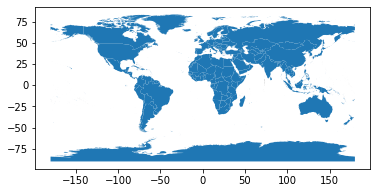

In [3]:
plt.figure(figsize=(12,15))
countries.plot()

## Read the CSV data

In [4]:
csv_file = os.path.join(data_path,"acled2019.csv")
df = pd.read_csv(csv_file)
print('Data Frame shape :',df.shape)
df.head(3)

Data Frame shape : (198761, 31)


,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,6768128,887,YEM45982,45982,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,Habban,14.3541,47.0765,2,Yemen Data Project; Aden al Ghad; Al Janoob al...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",0,1580761030,YEM
1,6768129,887,YEM45983,45983,31 December 2019,2019,1,Strategic developments,Change to group/activity,Military Forces of Yemen (2012-) Security Belt...,...,Habban,14.3541,47.0765,2,Al Janoob al Youm; Yemen Data Project,Local partner-National,"On 31 December 2019, forces loyal to the South...",0,1580761030,YEM
2,6768130,887,YEM45984,45984,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,Wadi Haburah,14.2081,47.1570,1,Al Janoob al Youm; Aden al Ghad; Yemen Data Pr...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",1,1580761030,YEM


### Convert to Lat-Long into XY using points_from_xy()
*  Convert the Lat-Long co-ordinates into x-y using points_from_xy() to transform Longitude and Latitude into list of sahpely. 


In [22]:
gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.longitude,df.latitude))
gdf.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,geometry
0,6768128,887,YEM45982,45982,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.3541,47.0765,2,Yemen Data Project; Aden al Ghad; Al Janoob al...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",0,1580761030,YEM,POINT (47.07650 14.35410)
1,6768129,887,YEM45983,45983,31 December 2019,2019,1,Strategic developments,Change to group/activity,Military Forces of Yemen (2012-) Security Belt...,...,14.3541,47.0765,2,Al Janoob al Youm; Yemen Data Project,Local partner-National,"On 31 December 2019, forces loyal to the South...",0,1580761030,YEM,POINT (47.07650 14.35410)
2,6768130,887,YEM45984,45984,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.2081,47.1570,1,Al Janoob al Youm; Aden al Ghad; Yemen Data Pr...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",1,1580761030,YEM,POINT (47.15700 14.20810)
3,6715395,356,IND68948,68948,31 December 2019,2019,1,Protests,Peaceful protest,Protesters (India),...,20.2724,85.8338,1,Pioneer (India),National,"On 31 December, students' wing of INC and Mili...",0,1578514389,IND,POINT (85.83380 20.27240)
4,6943236,222,SLV861,861,31 December 2019,2019,1,Violence against civilians,Attack,B-18: Barrio-18,...,13.5894,-89.2383,1,El Salvador.com,National,On 31th December 2019 in Huizucar (La Libertad...,1,1582839958,SLV,POINT (-89.23830 13.58940)


<Figure size 864x1080 with 0 Axes>

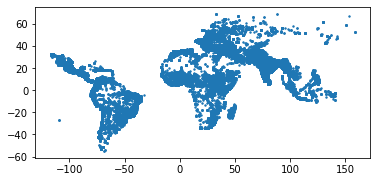

In [26]:
plt.figure(figsize=(12,15))
gdf.plot(markersize=2)

## Writing the data into Spartial format

### write to Shapefile

In [28]:
gdf.to_file(os.path.join(data_path,'acled2019.shp'),crs={'init':'epsg:4326'}) # shape file and Cordinate ref 


/home/tandonsa/anaconda3/envs/tf-2.4/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/tandonsa/anaconda3/envs/tf-2.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.


### Write to GeoJson

In [29]:
gdf.to_file(os.path.join(data_path,'acled2019-Geojson.geojson'),driver='GeoJSON')

## Reading the Subset 

to read the subset of the data , in geo pandas we can filter the data with geometry bounding box or rows

In [3]:
## read countries data frame 
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
# Reading subset of the data in geometry 
countries[countries['CONTINENT']== "Africa"].head(4)

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
13,Ethiopia,105350020,174700.0,2017,2007,2016,7. Least developed region,5. Low income,Africa,Africa,Eastern Africa,"POLYGON ((34.07070 9.45459, 34.06689 9.53118, ..."
14,S. Sudan,13026129,20880.0,2017,2008,2016,7. Least developed region,5. Low income,Africa,Africa,Eastern Africa,"POLYGON ((35.92084 4.61933, 35.85654 4.61960, ..."
15,Somalia,7531386,4719.0,2017,1987,2016,7. Least developed region,5. Low income,Africa,Africa,Eastern Africa,"POLYGON ((46.46696 6.53829, 46.48805 6.55864, ..."
16,Kenya,47615739,152700.0,2017,2009,2016,5. Emerging region: G20,5. Low income,Africa,Africa,Eastern Africa,"MULTIPOLYGON (((34.38119 4.62016, 34.45967 4.6..."


* Mask  --> while reading the data , we can filter out by geometry using mask parameter

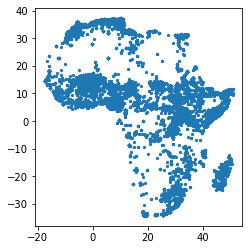

In [11]:
africa_acled = gpd.read_file(os.path.join(data_path,'acled2019.shp'),mask= countries[countries['CONTINENT']=='Africa'])
africa_acled.plot(markersize=5)

In [8]:
# Reading subset of the data in geometry 
countries[countries['CONTINENT']== "Asia"].head(4)

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
6,Dhekelia,7850,314.0,2013,-99,2013,2. Developed region: nonG7,2. High income: nonOECD,Asia,Asia,Western Asia,"POLYGON ((33.78094 34.97635, 33.76043 34.97968..."
7,Cyprus,1221549,29260.0,2017,2001,2016,6. Developing region,2. High income: nonOECD,Asia,Asia,Western Asia,"MULTIPOLYGON (((33.78183 34.97622, 33.78094 34..."


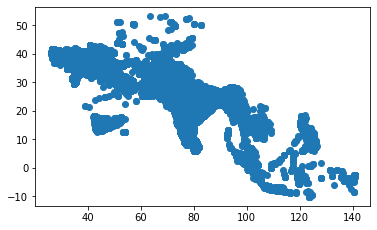

In [14]:
asia_acled = gpd.read_file(os.path.join(data_path,'acled2019.shp'),mask=countries[countries['CONTINENT']=='Asia'])
asia_acled.plot()

## To read the subset 

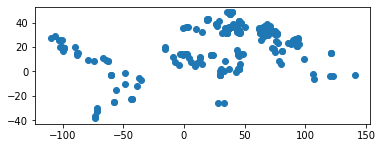

In [15]:
acled_subset = gpd.read_file(os.path.join(data_path,'acled2019.shp'),rows=slice(200,500)) # we can add rows =200
acled_subset.plot()

/home/tandonsa/anaconda3/envs/tf-2.4/lib/python3.7/site-packages/fiona/collection.py:263: RuntimeWarning: Layer does not support OLC_FASTFEATURECOUNT, negative slices or start values other than zero may be slow.
  self, start, stop, step, bbox, mask)


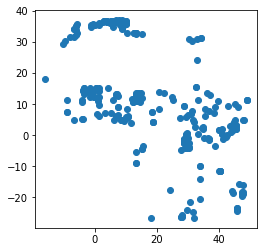

In [18]:
acled_subset2 = gpd.read_file(os.path.join(data_path,'acled2019.shp'),rows=slice(200,500),mask=countries[countries['CONTINENT']=='Africa'])
acled_subset2.plot()

## Coordinate Ref. System

There are multiple co-ordinate system to map from sphere to 2D Plot.

In [19]:
# read the data from shapefiles,Geopackage Geojson etc. 
shp = os.path.join(data_path,'countries.shp')
countries = gpd.read_file(shp)

print("shape of data ",countries.shape)
countries.head(3)

shape of data  (255, 12)


,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."


In [30]:
print(type(countries)) # Geo-data frame as it has geometry column
print(type(countries['NAME'])) # pandas Series 

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'pandas.core.series.Series'>


In [31]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
## read conflicts data 
conflicts = gpd.read_file(os.path.join(data_path,'acled2019.shp'),rows=500)
conflicts.head(4)


,data_id,iso,event_id_c,event_id_n,event_date,year,time_preci,event_type,sub_event_,actor1,...,latitude,longitude,geo_precis,source,source_sca,notes,fatalities,timestamp,iso3,geometry
0,6768128,887,YEM45982,45982,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.3541,47.0765,2,Yemen Data Project; Aden al Ghad; Al Janoob al...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",0,1580761030,YEM,POINT (47.07650 14.35410)
1,6768129,887,YEM45983,45983,31 December 2019,2019,1,Strategic developments,Change to group/activity,Military Forces of Yemen (2012-) Security Belt...,...,14.3541,47.0765,2,Al Janoob al Youm; Yemen Data Project,Local partner-National,"On 31 December 2019, forces loyal to the South...",0,1580761030,YEM,POINT (47.07650 14.35410)
2,6768130,887,YEM45984,45984,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.2081,47.1570,1,Al Janoob al Youm; Aden al Ghad; Yemen Data Pr...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",1,1580761030,YEM,POINT (47.15700 14.20810)
3,6715395,356,IND68948,68948,31 December 2019,2019,1,Protests,Peaceful protest,Protesters (India),...,20.2724,85.8338,1,Pioneer (India),National,"On 31 December, students' wing of INC and Mili...",0,1578514389,IND,POINT (85.83380 20.27240)


In [5]:
conflicts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
conflicts.crs.name

'WGS 84'

Different CRS have diff. measuremnts . For some , the co-ordinates are defined in decimal degrees while others are defined  in meters . Its common process to reproject data from one format to another in Geographic data processing 

Resource for getting the right projection http://spatialreference.org/

In [7]:
countries.geometry[:5]

0    MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...
1    MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...
2    MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...
3    POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...
4    MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...
Name: geometry, dtype: geometry

In [8]:
countries = countries[(countries.NAME !='Antarctica') & (countries.NAME != 'Fr. S. Antartica Lands')]
# project the data into Mercator Projection epsg=3395 used by google

countries_projected = countries.to_crs(epsg=3395)
countries_projected['geometry'][:5]

0    MULTIPOLYGON (((13102705.696 460777.652, 13102...
1    MULTIPOLYGON (((13102705.696 460777.652, 13101...
2    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
3    POLYGON ((-7737827.685 -1967028.785, -7737828....
4    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
Name: geometry, dtype: geometry

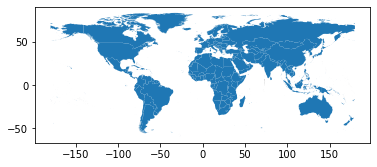

In [9]:
countries.plot()

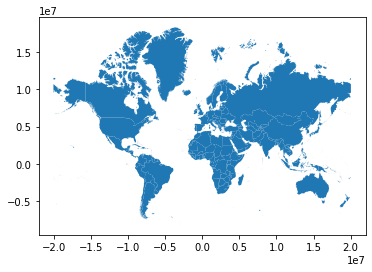

In [10]:
countries_projected.plot()

Notice the different scale of projected data . If we plot xy in different crs , data will not allign

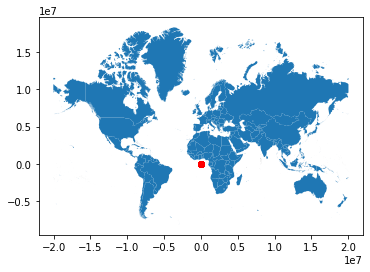

In [11]:
fig,ax = plt.subplots()
countries_projected.plot(ax=ax) # crs 3395 
conflicts.plot(ax=ax,color='red') # crs EPSG:4326

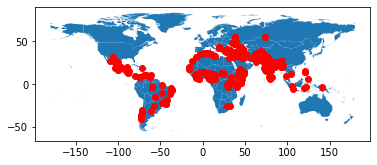

In [12]:
fig,ax = plt.subplots()
countries.plot(ax=ax) # crs 3395 
conflicts.plot(ax=ax,color='red') # crs 3395

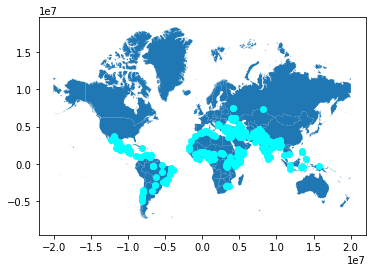

In [15]:
conflicts_projected = conflicts.to_crs(epsg=3395)
fig,ax = plt.subplots()
countries_projected.plot(ax=ax)
conflicts_projected.plot(ax=ax,color='cyan')

## Spartial Analysis 
* Spartial Join 
* Buffer Analysis 
* Overlay Analysis 
* NN Analysis 

## Spartial Join 

Table join as per columns and Spartial join on basis of geolocations

In [10]:
# read the conflic data 
conflicts = gpd.read_file(os.path.join(data_path,'acled2019.shp'),rows=500)
conflicts.head()

,data_id,iso,event_id_c,event_id_n,event_date,year,time_preci,event_type,sub_event_,actor1,...,latitude,longitude,geo_precis,source,source_sca,notes,fatalities,timestamp,iso3,geometry
0,6768128,887,YEM45982,45982,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.3541,47.0765,2,Yemen Data Project; Aden al Ghad; Al Janoob al...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",0,1580761030,YEM,POINT (47.07650 14.35410)
1,6768129,887,YEM45983,45983,31 December 2019,2019,1,Strategic developments,Change to group/activity,Military Forces of Yemen (2012-) Security Belt...,...,14.3541,47.0765,2,Al Janoob al Youm; Yemen Data Project,Local partner-National,"On 31 December 2019, forces loyal to the South...",0,1580761030,YEM,POINT (47.07650 14.35410)
2,6768130,887,YEM45984,45984,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.2081,47.1570,1,Al Janoob al Youm; Aden al Ghad; Yemen Data Pr...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",1,1580761030,YEM,POINT (47.15700 14.20810)
3,6715395,356,IND68948,68948,31 December 2019,2019,1,Protests,Peaceful protest,Protesters (India),...,20.2724,85.8338,1,Pioneer (India),National,"On 31 December, students' wing of INC and Mili...",0,1578514389,IND,POINT (85.83380 20.27240)
4,6943236,222,SLV861,861,31 December 2019,2019,1,Violence against civilians,Attack,B-18: Barrio-18,...,13.5894,-89.2383,1,El Salvador.com,National,On 31th December 2019 in Huizucar (La Libertad...,1,1582839958,SLV,POINT (-89.23830 13.58940)


In [15]:
conflicts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

 # Table join

In [17]:
country_name=countries[['NAME','POP_EST']]
print(type(country_name))
country_name.head()

<class 'pandas.core.frame.DataFrame'>


,NAME,POP_EST
0,Indonesia,260580739
1,Malaysia,31381992
2,Chile,17789267
3,Bolivia,11138234
4,Peru,31036656


In [20]:
country_shape=countries[['geometry','NAME']]
print(type(country_shape))
country_shape.head()


<class 'geopandas.geodataframe.GeoDataFrame'>


,geometry,NAME
0,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Indonesia
1,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",Malaysia
2,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",Chile
3,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",Bolivia
4,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",Peru


In [21]:
country_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
# join two table based on name
country_gdf_merged = country_shape.merge(country_name,on='NAME',how='left')
print(type(country_gdf_merged))
country_gdf_merged.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,geometry,NAME,POP_EST
0,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Indonesia,260580739
1,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",Malaysia,31381992
2,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",Chile,17789267
3,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",Bolivia,11138234
4,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",Peru,31036656


In [8]:
country_df_merged = country_name.merge(country_shape,on='NAME',how='left')
print(type(country_df_merged))
country_df_merged.head()

<class 'pandas.core.frame.DataFrame'>


,NAME,POP_EST,geometry
0,Indonesia,260580739,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,31036656,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


## Saptial Join

we want to join the two tables based on thier locations , for example which country contain which city or which city contains which country .

In [11]:
conflicts_gdf = conflicts[['event_id_c','event_date','fatalities','geometry']]
conflicts_gdf.head()

,event_id_c,event_date,fatalities,geometry
0,YEM45982,31 December 2019,0,POINT (47.07650 14.35410)
1,YEM45983,31 December 2019,0,POINT (47.07650 14.35410)
2,YEM45984,31 December 2019,1,POINT (47.15700 14.20810)
3,IND68948,31 December 2019,0,POINT (85.83380 20.27240)
4,SLV861,31 December 2019,1,POINT (-89.23830 13.58940)


In [12]:
conflicts_in_countries = gpd.sjoin(conflicts_gdf,country_shape,how='inner',op='within')
conflicts_in_countries.sample(10)

/home/tandonsa/anaconda3/envs/tf-2.4/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,event_id_c,event_date,fatalities,geometry,index_right,NAME
67,IRQ22720,31 December 2019,0,POINT (44.42130 33.32480),90,Iraq
434,BRA10720,30 December 2019,0,POINT (-43.30080 -22.85690),45,Brazil
133,YEM45954,31 December 2019,0,POINT (44.62350 13.86660),161,Yemen
163,VEN3393,31 December 2019,0,POINT (-69.35700 10.06470),158,Venezuela
228,BRA10734,31 December 2019,1,POINT (-48.32770 -10.16750),45,Brazil
243,SOM30207,31 December 2019,5,POINT (44.92590 2.25100),15,Somalia
267,EGY10649,31 December 2019,0,POINT (31.38070 31.03640),160,Egypt
50,ARG1263,31 December 2019,0,POINT (-60.91600 -31.97450),5,Argentina
256,SOM30211,31 December 2019,0,POINT (45.33370 2.04140),15,Somalia
30,COL1824,31 December 2019,0,POINT (-75.53310 7.78720),137,Colombia


each conflict point is matched with its corresponfding country based on the location .op=within takes the conflict point that are within a countries polygon , we could have used intersect and op=contains and find out which country contains city point 

In [23]:
conflicts_in_cities = gpd.sjoin(conflicts_gdf,country_shape,how='inner',op='contains')
conflicts_in_countries.sample(10)

/home/tandonsa/anaconda3/envs/tf-2.4/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,event_id_c,event_date,fatalities,geometry,index_right,NAME
303,AFG42752,31 December 2019,0,POINT (64.57000 31.82090),129,Afghanistan
30,COL1824,31 December 2019,0,POINT (-75.53310 7.78720),137,Colombia
400,LBN3259,30 December 2019,0,POINT (35.82660 34.41700),12,Lebanon
12,IND68960,31 December 2019,0,POINT (76.49880 30.79010),8,India
0,YEM45982,31 December 2019,0,POINT (47.07650 14.35410),161,Yemen
5,UKR31063,31 December 2019,0,POINT (38.56950 48.71910),34,Ukraine
226,SYR73667,31 December 2019,0,POINT (36.67660 35.64760),20,Syria
480,UKR31021,30 December 2019,0,POINT (37.63400 47.77410),34,Ukraine
465,IND68903,30 December 2019,0,POINT (74.24080 33.15990),8,India
251,SYR73716,31 December 2019,0,POINT (36.26930 35.61620),20,Syria


In [51]:
import seaborn as sns
plt.figure(figsize=(5,3))
           
conflicts_india = conflicts_in_countries.loc[conflicts_in_countries.NAME == 'Afghanistan']
print(conflicts_india.groupby(['event_date'])['fatalities'].sum())


event_date
31 December 2019    115
Name: fatalities, dtype: int64


<Figure size 360x216 with 0 Axes>

## Buffer Analysis
Buffer analysis is an important geoprocessing task . It is widely used in many domains to get a distance around a point /Line /Polygon . One tricky thing is we need to know the crs using to get correct output .
if the projection is not in meters . use http://spatialreference.org/ref/epsg/sweref99-tm/

In [53]:
countries_data = os.path.join(data_path,'countries.shp')
countries = gpd.read_file(countries_data)
countries.head()

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,Americas,South America,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,31036656,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [57]:
# get centroid of the POLYGON data
countries_centroid = countries.geometry.centroid
countries_centroid.head()# convert data to polygon

/home/tandonsa/anaconda3/envs/tf-2.4/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


0     POINT (117.27043 -2.22296)
1      POINT (109.69887 3.79239)
2    POINT (-71.36437 -37.74361)
3    POINT (-64.68475 -16.70688)
4     POINT (-74.37806 -9.15439)
dtype: geometry

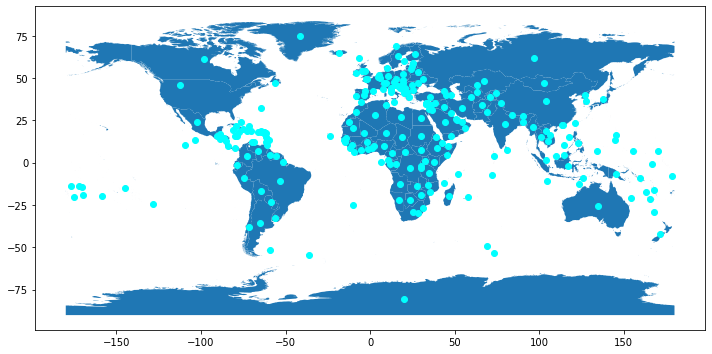

In [58]:
fig,ax = plt.subplots(figsize=(12,10))
countries.plot(ax=ax)
countries_centroid.plot(ax=ax,color='cyan')

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
8,India,1281935911,8721000.0,2017,2011,2016,3. Emerging region: BRIC,4. Lower middle income,Asia,Asia,Southern Asia,"MULTIPOLYGON (((77.80035 35.49541, 77.81533 35..."


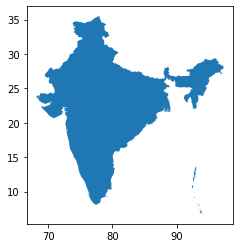

In [62]:
india = countries[countries['NAME']=='India']
india.plot() 
india.head()

In [63]:
print(india.crs)
india_centroid = india.geometry.centroid
india_centroid.head()

epsg:4326


/home/tandonsa/anaconda3/envs/tf-2.4/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


8    POINT (79.61572 22.88795)
dtype: geometry

In [64]:
india_centroid.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

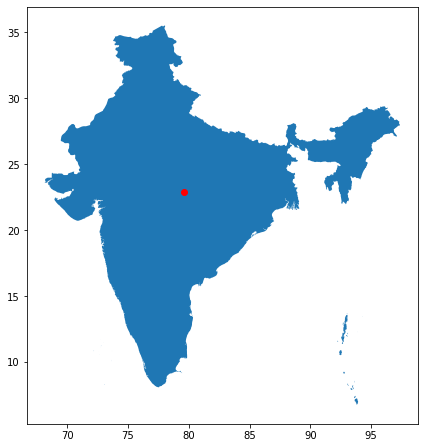

In [67]:
fig,ax = plt.subplots(figsize=(7,9))
india.plot(ax=ax)
india_centroid.plot(ax=ax,color='red')

## we see the data is still in degree crs 

/home/tandonsa/anaconda3/envs/tf-2.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
/home/tandonsa/anaconda3/envs/tf-2.4/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


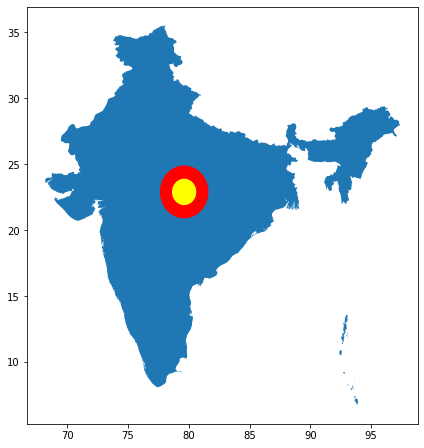

In [68]:
india_centroid_1degree = india_centroid.buffer(1)
india_centroid_2degree = india_centroid.buffer(2)
# creating buffer in 1 and 2 degrees 
fig,ax = plt.subplots(figsize=(7,9))
india.plot(ax=ax)
india_centroid_2degree.plot(ax=ax,color='red')
india_centroid_1degree.plot(ax=ax,color='yellow')

### we need to project to meter based co-ordinate system ESPG:3006


In [69]:
india_projected = india.to_crs({'init':'epsg:3006'})
india_centroid_projected = india_centroid.to_crs({'init':'epsg:3006'})
print(india_projected.crs)
print(india_centroid_projected.crs)

+init=epsg:3006 +type=crs
+init=epsg:3006 +type=crs


/home/tandonsa/anaconda3/envs/tf-2.4/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [71]:
india_projected.crs #in meters

<Projected CRS: +init=epsg:3006 +type=crs>
Name: SWEREF99 TM
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Sweden - onshore and offshore.
- bounds: (10.03, 54.96, 24.17, 69.07)
Coordinate Operation:
- name: SWEREF99 TM
- method: Transverse Mercator
Datum: SWEREF99
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

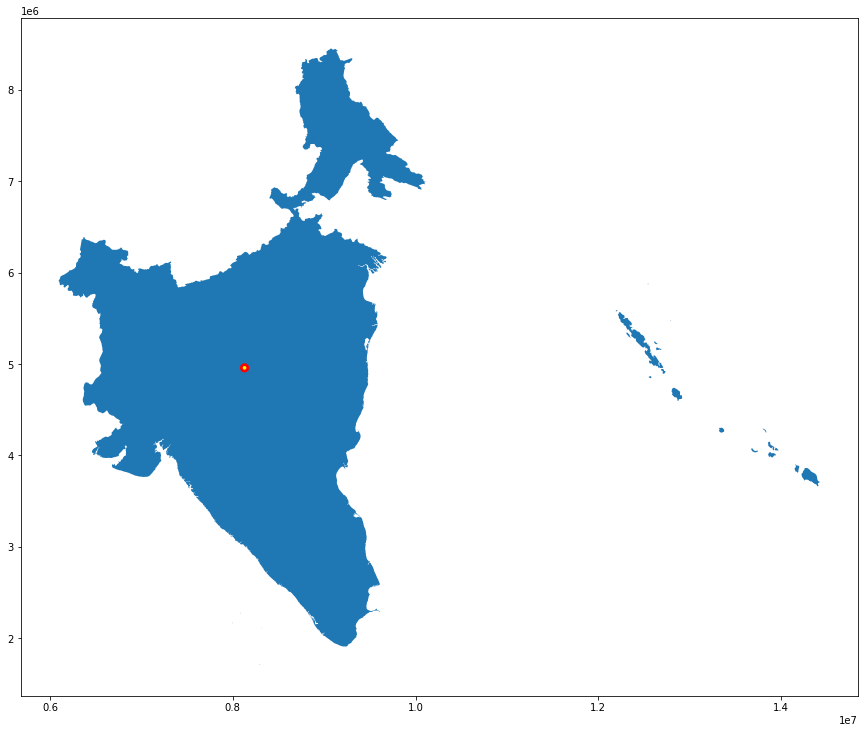

In [84]:
india_centroid_200km = india_centroid_projected.buffer(20000)
india_centroid_500km = india_centroid_projected.buffer(50000)

fig,ax = plt.subplots(figsize=(15,17))
india_projected.plot(ax=ax)
india_centroid_50km.plot(ax=ax,color='red')
india_centroid_20km.plot(ax=ax,color='yellow')


* centroid --> returns the centre point in the polygon
* buffer   --> returns the circle buffer around the point

## Overlay Analysis
We need to create new features out of diff. data types like Points , Lines ,Polygons. Set Operations and Overlays are important  role here 

In [98]:
import geopandas as gpd 
from matplotlib import pyplot as plt
from pyproj import Proj

In [99]:
gpd.datasets.available

['naturalearth_lowres', 'naturalearth_cities', 'nybb']

In [100]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
capitals = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [101]:
capitals.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


In [102]:
capitals.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

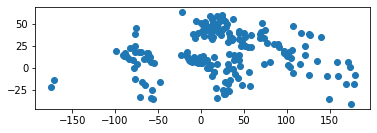

In [103]:
capitals.plot()

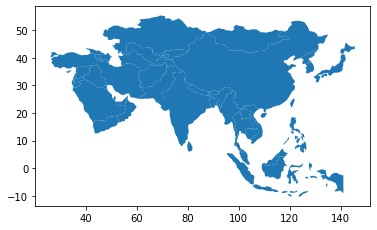

In [110]:
asia = world[world['continent']=='Asia']
asia= asia[['geometry','name']]

asia.plot()

In [111]:
asia.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [112]:
asia = asia.to_crs("epsg:3395")
capitals = capitals.to_crs("epsg:3395")

In [113]:
capitals.head() # from degree to point 

,name,geometry
0,Vatican City,POINT (1386304.649 5117957.424)
1,San Marino,POINT (1385011.519 5425900.277)
2,Vaduz,POINT (1059390.800 5932596.001)
3,Luxembourg,POINT (682388.791 6346728.171)
4,Palikir,POINT (17605174.611 766692.137)


In [114]:
# make a buffer of 500km 
capitals['geometry'] = capitals.buffer(500000)
capitals.head() # from point to polygon

,name,geometry
0,Vatican City,"POLYGON ((1886304.649 5117957.424, 1883897.012..."
1,San Marino,"POLYGON ((1885011.519 5425900.277, 1882603.882..."
2,Vaduz,"POLYGON ((1559390.800 5932596.001, 1556983.163..."
3,Luxembourg,"POLYGON ((1182388.791 6346728.171, 1179981.154..."
4,Palikir,"POLYGON ((18105174.611 766692.137, 18102766.97..."


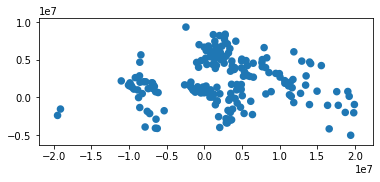

In [115]:
 capitals.plot()

* intersection

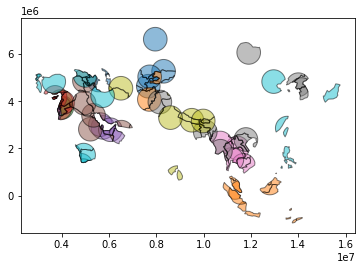

In [116]:
asia_cores = gpd.overlay(asia,capitals,how='intersection')
asia_cores.plot(alpha=0.5,edgecolor='k',cmap='tab10')

* Difference Overlays the areas which are beyond 500km or far from capitals 

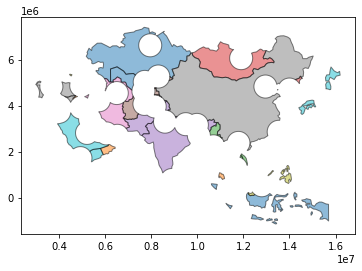

In [117]:
asia_peripheries = gpd.overlay(asia,capitals,how='difference')
asia_peripheries.plot(alpha=0.5,edgecolor='k',cmap='tab10')

* overlay --> detemines the set of all individual geometries from the two input GeoDataframes
* buffer --> calculates a buffer around  the point and we can change the point to Polygon 

## Nearest Neighrbhood Analysis

Finding the nearest neighbourhood of the object to another is a common spartial data analysis task . For example , determining closest service point to your home is an optmization problem that requires performing NN Analysis with spartial data

In [12]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import folium
from shapely.ops import nearest_points
from shapely.geometry import LineString
import os
ops_data_path = '/home/tandonsa/2+-+Introduction+to+Geopandas/data/3+-+Spatial+Operations/data/bike_data'

In [13]:
stations = pd.read_csv(os.path.join(ops_data_path,'stations.csv'))
points = pd.read_csv(os.path.join(ops_data_path,'points.csv'))

In [14]:
stations.head()

,id,name,dpcapacity,xcoord,ycoord
0,5,State St & Harrison St,19,-87.627739,41.873958
1,13,Wilton Ave & Diversey Pkwy,19,-87.652681,41.932500
2,14,Morgan St & 18th St,15,-87.651073,41.858086
3,15,Racine Ave & 19th St,15,-87.656471,41.856453
4,16,Wood St & North Ave,15,-87.672516,41.910329


In [15]:
points.head() # randomly generated points

,id,xcoord,ycoord
0,1,-87.675992,41.969792
1,2,-87.676702,41.956395
2,3,-87.601501,41.805379
3,4,-87.616656,41.858263
4,5,-87.706869,41.963010


In [16]:
def create_gdf(df,x='xcoord',y='ycoord'):
    return gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df[x],df[y]),crs="epsg:4326")

stations_gdf = create_gdf(stations)
points_gdf = create_gdf(points)

In [17]:
points_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
stations_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
stations_gdf.head()

,id,name,dpcapacity,xcoord,ycoord,geometry
0,5,State St & Harrison St,19,-87.627739,41.873958,POINT (-87.62774 41.87396)
1,13,Wilton Ave & Diversey Pkwy,19,-87.652681,41.932500,POINT (-87.65268 41.93250)
2,14,Morgan St & 18th St,15,-87.651073,41.858086,POINT (-87.65107 41.85809)
3,15,Racine Ave & 19th St,15,-87.656471,41.856453,POINT (-87.65647 41.85645)
4,16,Wood St & North Ave,15,-87.672516,41.910329,POINT (-87.67252 41.91033)


In [20]:
points_gdf.head()

,id,xcoord,ycoord,geometry
0,1,-87.675992,41.969792,POINT (-87.67599 41.96979)
1,2,-87.676702,41.956395,POINT (-87.67670 41.95640)
2,3,-87.601501,41.805379,POINT (-87.60150 41.80538)
3,4,-87.616656,41.858263,POINT (-87.61666 41.85826)
4,5,-87.706869,41.963010,POINT (-87.70687 41.96301)


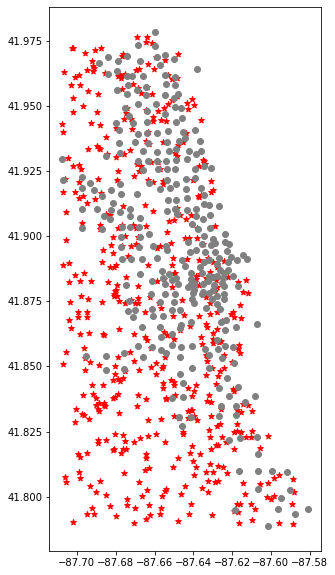

In [21]:
fig,ax = plt.subplots(figsize=(7,10))
points_gdf.plot(ax=ax,color='red',marker='*')
stations_gdf.plot(ax=ax,color='grey')
plt.show()

# Red dots random points and gray are actual stations

In [22]:
def calculate_nearest(row,destination,val,col='geometry'):
    dest_unary = destination['geometry'].unary_union # to combine all the geometry
    nearest_geom = nearest_points(row[col],dest_unary)
    match_geom = destination.loc[destination.geometry==nearest_geom[1]]
    match_value= match_geom[val].to_numpy()[0]
    return match_value

In [23]:
points_gdf["nearest_geom"]=points_gdf.apply(calculate_nearest,destination=stations_gdf,val='geometry',axis=1)
points_gdf.head()

,id,xcoord,ycoord,geometry,nearest_geom
0,1,-87.675992,41.969792,POINT (-87.67599 41.96979),POINT (-87.67423700000001 41.96909)
1,2,-87.676702,41.956395,POINT (-87.67670 41.95640),POINT (-87.679259 41.955927)
2,3,-87.601501,41.805379,POINT (-87.60150 41.80538),POINT (-87.59938299999999 41.809835)
3,4,-87.616656,41.858263,POINT (-87.61666 41.85826),POINT (-87.619407 41.857611)
4,5,-87.706869,41.963010,POINT (-87.70687 41.96301),POINT (-87.68848699999999 41.966555)


In [24]:
points_gdf["nearest_stations"]=points_gdf.apply(calculate_nearest,destination=stations_gdf,val='name',axis=1)
points_gdf.head()

,id,xcoord,ycoord,geometry,nearest_geom,nearest_stations
0,1,-87.675992,41.969792,POINT (-87.67599 41.96979),POINT (-87.67423700000001 41.96909),Ravenswood Ave & Lawrence Ave
1,2,-87.676702,41.956395,POINT (-87.67670 41.95640),POINT (-87.679259 41.955927),Lincoln Ave & Belle Plaine Ave
2,3,-87.601501,41.805379,POINT (-87.60150 41.80538),POINT (-87.59938299999999 41.809835),Greenwood Ave & 47th St
3,4,-87.616656,41.858263,POINT (-87.61666 41.85826),POINT (-87.619407 41.857611),Calumet Ave & 18th St
4,5,-87.706869,41.963010,POINT (-87.70687 41.96301),POINT (-87.68848699999999 41.966555),Western Ave & Leland Ave


In [25]:
points_gdf['line'] = points_gdf.apply(lambda row:LineString([row['geometry'],row['nearest_geom']]),axis=1)

In [26]:
points_gdf.head()

,id,xcoord,ycoord,geometry,nearest_geom,nearest_stations,line
0,1,-87.675992,41.969792,POINT (-87.67599 41.96979),POINT (-87.67423700000001 41.96909),Ravenswood Ave & Lawrence Ave,LINESTRING (-87.67599211881929 41.969792417635...
1,2,-87.676702,41.956395,POINT (-87.67670 41.95640),POINT (-87.679259 41.955927),Lincoln Ave & Belle Plaine Ave,LINESTRING (-87.6767023973826 41.9563952204838...
2,3,-87.601501,41.805379,POINT (-87.60150 41.80538),POINT (-87.59938299999999 41.809835),Greenwood Ave & 47th St,"LINESTRING (-87.601501134953 41.8053785205414,..."
3,4,-87.616656,41.858263,POINT (-87.61666 41.85826),POINT (-87.619407 41.857611),Calumet Ave & 18th St,LINESTRING (-87.61665568206151 41.858262512299...
4,5,-87.706869,41.963010,POINT (-87.70687 41.96301),POINT (-87.68848699999999 41.966555),Western Ave & Leland Ave,LINESTRING (-87.7068694739994 41.9630104417897...


In [27]:
line_gdf = points_gdf[['id','nearest_stations','line']].set_geometry('line')
line_gdf.geometry

0      LINESTRING (-87.67599 41.96979, -87.67424 41.9...
1      LINESTRING (-87.67670 41.95640, -87.67926 41.9...
2      LINESTRING (-87.60150 41.80538, -87.59938 41.8...
3      LINESTRING (-87.61666 41.85826, -87.61941 41.8...
4      LINESTRING (-87.70687 41.96301, -87.68849 41.9...
                             ...                        
493    LINESTRING (-87.66327 41.92158, -87.66309 41.9...
494    LINESTRING (-87.68038 41.84712, -87.68511 41.8...
495    LINESTRING (-87.65710 41.92564, -87.65840 41.9...
496    LINESTRING (-87.66918 41.97626, -87.66837 41.9...
497    LINESTRING (-87.66973 41.89712, -87.66775 41.8...
Name: line, Length: 498, dtype: geometry

In [34]:
line_gdf.crs = "epsg:4326"

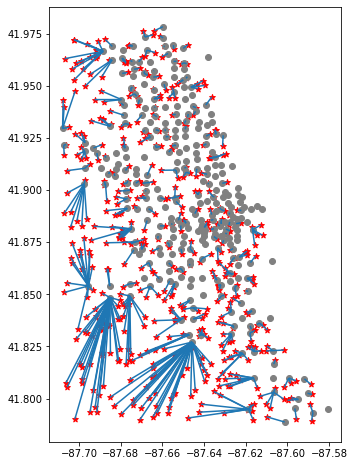

In [28]:
fig,ax = plt.subplots(figsize=(10,8))
points_gdf.plot(ax=ax,color='red',marker='*')
stations_gdf.plot(ax=ax,color='grey')
line_gdf.plot(ax=ax)
plt.show()

In [35]:
m = folium.Map([41.805379,-87.601501],zoom_start = 12)# tiles='CartoDb dark_matter')
locs_stations = zip(stations_gdf.ycoord,stations_gdf.xcoord)
locs_points = zip(points_gdf.ycoord,points_gdf.xcoord)
for location in locs_stations:
    folium.CircleMarker(location=location,color='red',radius=8).add_to(m)
for location in locs_points:
    folium.CircleMarker(location=location,color='white',radius=4).add_to(m)

folium.GeoJson(line_gdf).add_to(m)
m.save('map2.html')
m

* Unary_union --> return the geometry containing the union of all the geometries in GeoSeries
* nearest_points --> can calculate nearest geometries 
* set_geometry --> set the geometry of the geodataframe